In [34]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

In [35]:
def load_data(file_path):
    return pd.read_csv(file_path)


In [36]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Genre_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data  # Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


        UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0            1     1193       5       0          0          0           0   
1            1      661       3       0          0          1           1   
2            1      914       3       0          0          0           0   
3            1     3408       4       0          0          0           0   
4            1     2355       5       0          0          1           1   
...        ...      ...     ...     ...        ...        ...         ...   
869365    4211     3791       2       0          0          0           0   
869366    4211     3806       3       0          0          0           0   
869367    4211     3840       4       0          0          0           0   
869368    4211     3766       2       1          0          0           0   
869369    4211     3834       2       0          1          0           0   

        Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi 

In [37]:
# Convert MovieID and UserID to int16
data_matrix["MovieID"] = data_matrix["MovieID"].astype(np.int16)
data_matrix["UserID"] = data_matrix["UserID"].astype(np.int16)
for col in data_matrix.columns:
    if col != "MovieID" and col != "UserID":
        data_matrix[col] = data_matrix[col].astype(np.int8)
print(data_matrix.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


In [38]:
df=data_matrix
# Initialize an empty dictionary to store genre-wise ratings for each user
genre_ratings = {}
genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    user_id = row['UserID']
    rating = row['Rating']
    # Iterate over each genre and update the genre_ratings dictionary
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = {}
        if user_id not in genre_ratings[genre]:
            genre_ratings[genre][user_id] = {'total_rating': 0, 'count': 0}
        if row[genre] == 1:  # Check if the movie belongs to the genre
            genre_ratings[genre][user_id]['total_rating'] += rating
            genre_ratings[genre][user_id]['count'] += 1

# Initialize an empty dictionary to store the final DataFrame values
data = {}

# Iterate over each user and calculate the average rating for each genre
for user_id in set(df['UserID']):
    user_data = {}
    for genre, values in genre_ratings.items():
        if user_id in values and values[user_id]['count']>0:
            user_data[genre] = values[user_id]['total_rating'] / values[user_id]['count']
        else:
            user_data[genre] = np.nan
    data[user_id] = user_data

# Create the final DataFrame
result_df = pd.DataFrame.from_dict(data, orient='index')

In [39]:
data_mat=result_df
data_mat=data_mat.sort_index()
data_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.000000,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.000000,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.500000,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.500000,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.634921,3.000000,3.250000,2.035714,2.246154,3.150000,NaN,3.116071,3.083333,3.000000,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.000000,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.250000,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6038,3.000000,4.000000,3.666667,3.000000,3.833333,NaN,NaN,3.888889,NaN,NaN,2.500000,NaN,NaN,4.166667,4.000000,NaN,4.000000,NaN


In [40]:
user_ids = set(df['UserID'])
user_ids=sorted(user_ids)
user_ids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,

In [41]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [42]:
avg_rating

,Genre,Avg. Rating
0,Horror,3.215013
1,Children's,3.422035
2,Fantasy,3.447371
3,Sci-Fi,3.466521
4,Adventure,3.477257
5,Action,3.491185
6,Comedy,3.522099
7,Thriller,3.570466
8,Romance,3.607465
9,Western,3.637770


In [43]:
avgdict = avg_rating.set_index('Genre')['Avg. Rating'].to_dict()
avg_dict = {key: float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}


A_mat = data_mat
A_watched=data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
# print(avg_dict)
A_mat= A_mat.fillna(avg_dict)
A_np=A_mat.values
A_np

array([[4.2       , 4.        , 4.11111111, ..., 3.66666667, 5.        ,
        3.63777015],
       [3.5       , 3.73684211, 3.68486822, ..., 3.48387097, 3.73333333,
        4.33333333],
       [3.95652174, 4.        , 4.        , ..., 3.8       , 4.        ,
        4.66666667],
       ...,
       [3.64285714, 4.        , 4.        , ..., 3.70588235, 4.        ,
        3.75      ],
       [3.        , 4.        , 3.66666667, ..., 3.57046605, 4.        ,
        3.63777015],
       [2.97619048, 2.81818182, 3.        , ..., 3.92682927, 3.69565217,
        4.        ]])

In [44]:
A_mat=A_mat.round(2)
# print(A_mat.dtypes)
A_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.20,4.00,4.11,4.25,4.14,4.00,3.93,4.43,4.00,4.08,3.22,4.29,3.67,3.67,4.33,3.67,5.00,3.64
2,3.50,3.74,3.68,3.42,3.56,3.58,3.93,3.90,3.00,4.00,3.00,3.67,3.33,3.71,3.59,3.48,3.73,4.33
3,3.96,4.00,4.00,4.00,3.77,3.71,3.93,4.00,4.50,4.08,2.67,4.00,3.00,3.80,3.83,3.80,4.00,4.67
4,4.16,3.83,3.68,4.00,3.52,5.00,3.93,4.17,4.50,4.08,4.33,3.67,3.67,4.00,3.56,3.50,3.33,4.50
5,2.61,3.00,4.00,3.83,3.41,3.29,3.67,3.10,3.45,4.00,2.80,3.33,3.12,3.10,3.07,2.85,3.50,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.63,3.00,3.25,2.04,2.25,3.15,3.93,3.12,3.08,3.00,2.33,1.50,3.30,3.05,2.76,1.97,3.31,2.33
6036,3.00,2.99,3.91,3.44,3.20,3.53,3.91,3.51,3.00,4.06,2.99,3.71,3.41,3.35,2.83,3.14,3.79,3.64
6037,3.64,4.00,4.00,3.67,3.58,3.83,4.00,3.88,4.25,3.44,4.11,4.00,3.69,3.68,3.69,3.71,4.00,3.75
6038,3.00,4.00,3.67,3.00,3.83,3.71,3.93,3.89,3.45,4.08,2.50,3.67,3.67,4.17,4.00,3.57,4.00,3.64


In [45]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
print("This is nonzero diag")
print(non_zero_diag)
U_red,Sigma_red,V_red = A.randomized_svd(len(non_zero_diag))  # Number of components for SVD 


Outputs

[[ 0.01489812  0.01247048 -0.00641913 ...  0.          0.
   0.        ]
 [ 0.01336807  0.00012742  0.00266836 ...  0.          0.
   0.        ]
 [ 0.01429362  0.01526223 -0.00842611 ...  0.          0.
   0.        ]
 ...
 [ 0.01410145  0.00726977 -0.01280221 ...  0.          0.
   0.        ]
 [ 0.01351398 -0.00108815  0.00319666 ...  0.          0.
   0.        ]
 [ 0.01344493 -0.00289906  0.01694269 ...  0.          0.
   0.        ]]
[[1150.2112687     0.            0.         ...    0.
     0.            0.        ]
 [   0.           60.31122799    0.         ...    0.
     0.            0.        ]
 [   0.            0.           56.16518449 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
[[ 2.31076128e-01 -6.57037145e

In [46]:
np.savetxt('U_red_Kmeans.txt', U_red)
np.savetxt('Sigma_red_Kmeans.txt', Sigma_red)
np.savetxt('V_red_Kmeans.txt', V_red)

In [47]:
U_red = np.loadtxt('U_red_Kmeans.txt')
Sigma_red = np.loadtxt('Sigma_red_Kmeans.txt')
V_red = np.loadtxt('V_red_Kmeans.txt')
print(U_red.shape)
print(Sigma_red.shape)
print(V_red.shape)

(5329, 18)
(18, 18)
(18, 18)


In [48]:
def elbow_method(data, max_clusters=4 , skip_factor=1):
    distortions = []
    # Generate x-axis values with skip_factor increments
    x_values = range(skip_factor, max_clusters + 1, skip_factor)
    for i in x_values:
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())  # km.inertia_ gives the distortion (cost)
    # Plotting the elbow curve
    plt.plot(x_values, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

new_mat = U_red
new_mat
# Assuming your data is in V_red_T
# Perform Elbow Method


array([[ 0.01489812,  0.01247048, -0.00641913, ...,  0.01468442,
         0.00739715, -0.007662  ],
       [ 0.01336807,  0.00012742,  0.00266836, ...,  0.00146392,
        -0.00877769, -0.00882668],
       [ 0.01429362,  0.01526223, -0.00842611, ...,  0.00142643,
         0.00176494, -0.00270945],
       ...,
       [ 0.01410145,  0.00726977, -0.01280221, ..., -0.00347995,
        -0.00903895, -0.00242739],
       [ 0.01351398, -0.00108815,  0.00319666, ...,  0.00511796,
        -0.03691237,  0.00729568],
       [ 0.01344493, -0.00289906,  0.01694269, ..., -0.01409464,
        -0.01302258,  0.00137457]])

sample_points_ids
[4392, 1800, 252]
the tuples
(0.012631970020987522, -0.007998916734499689, -0.005270458412076504, -0.009119348548851106, -0.0008059524764107779, -0.0122837497898417, -0.00043982182343520816, -0.008672406545494105, -0.003544651242880803, -0.019124938030025723, 0.009457838504344162, -0.01579144147414924, -0.004391969222258223, 0.0007296331585397676, 0.006152122187428369, 0.004508556672601134, 0.004055356853704967, -0.007955889591119727)
Distance Matrix
[[0.04852169 0.05728873 0.09954804]
 [0.04857354 0.03694423 0.09231289]
 [0.05508108 0.05428733 0.0978413 ]
 ...
 [0.04628231 0.04410668 0.07189106]
 [0.06783666 0.05231243 0.09069578]
 [0.06548483 0.06767335 0.11348179]]
closest
[0 1 1 ... 1 1 0]
Distance Matrix
[[0.03764463 0.04203396 0.07710492]
 [0.03235012 0.0252989  0.06934901]
 [0.03853611 0.03835386 0.07269187]
 ...
 [0.03253911 0.03155169 0.04849667]
 [0.05467514 0.04739192 0.07237454]
 [0.05239865 0.05235861 0.08678088]]
closest
[0 1 1 ... 1 1 1]
Distance Matrix

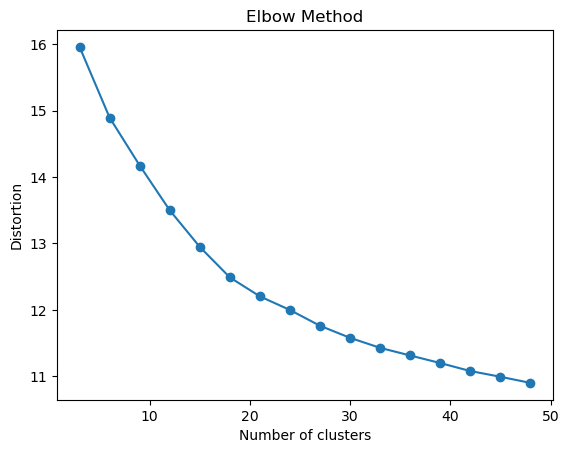

In [49]:
elbow_method(U_red,50,3)

In [50]:
km = KMeans(50)
km.fit(U_red)

sample_points_ids
[163, 964, 1726, 4773, 2996, 1922, 1505, 1826, 1304, 4002, 4683, 1302, 2153, 1636, 1813, 2777, 4316, 4413, 4892, 3778, 4901, 4989, 4695, 3167, 2457, 181, 4199, 1319, 4329, 1344, 4435, 2955, 92, 3016, 4034, 576, 3641, 2605, 980, 2533, 3164, 1758, 154, 3895, 3183, 309, 5165, 1917, 1150, 796]
the tuples
(0.013363426351129552, -0.027784929075823278, 0.003122056865483426, -0.003981963867539588, 0.022439687628776177, -0.0253342952908587, 0.013570712093623987, -0.010747642913616698, 0.0012050173536661123, -0.008477025411191596, 0.0031238330409570883, 0.005726869040340648, -0.008619519427904017, 0.000832186818351679, 0.0045014581900480145, 0.0009147304184449807, -0.000744162910317484, -0.003479270665411868)
Distance Matrix
[[0.06240177 0.08759851 0.07327535 ... 0.07238541 0.0580613  0.06748495]
 [0.06245104 0.08980935 0.0623474  ... 0.06185936 0.06684576 0.06213811]
 [0.06808565 0.09451265 0.07316157 ... 0.07137158 0.0689456  0.07260205]
 ...
 [0.0573654  0.09496897 0.0655685

Distance Matrix
[[0.0564374  0.05503574 0.0655058  ... 0.06038855 0.04552207 0.05521431]
 [0.04626537 0.04982731 0.04935899 ... 0.05100102 0.05242619 0.05062628]
 [0.05916432 0.05670224 0.05573179 ... 0.05529916 0.05872131 0.05544197]
 ...
 [0.05389472 0.06108065 0.0576985  ... 0.06007904 0.04417094 0.05261851]
 [0.0625661  0.04071919 0.07226269 ... 0.06491518 0.06494076 0.06533891]
 [0.05826916 0.05352142 0.06516955 ... 0.07497977 0.06056565 0.0594156 ]]
closest
[ 4 18 42 ...  7  1  3]
Distance Matrix
[[0.05612016 0.05415198 0.06524157 ... 0.05871584 0.04485439 0.05413864]
 [0.04512838 0.04722571 0.04788821 ... 0.05039271 0.05005127 0.04943614]
 [0.05857715 0.05553375 0.05417435 ... 0.05494256 0.05753795 0.05331287]
 ...
 [0.05322345 0.05882479 0.05708538 ... 0.05840739 0.04287945 0.05038852]
 [0.06144226 0.037862   0.07079119 ... 0.06493784 0.06353325 0.06597684]
 [0.05821816 0.05301282 0.06379625 ... 0.07319245 0.05983737 0.05938476]]
closest
[ 4 18 42 ...  7  1  3]
Distance Matrix


In [51]:
class SimilarityMetric:

    def calculateSimilarity(self, u, v, u_mean, v_mean):
        pass

In [52]:
class CosineSimilarity(SimilarityMetric):
    def calculateSimilarity(self, u, v, u_mean, v_mean):
        u = np.nan_to_num(u, nan=0)
        v = np.nan_to_num(v, nan=0)
        return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v) + 1e-9)

In [53]:
class CollaborativeFiltering:

    def __init__(self, data, metric:SimilarityMetric):
        """
        Initialize CollaborativeFiltering object with user-item rating data.
        
        Parameters:
        - data: DataFrame containing user-item ratings
        """
        self.data = data
        self.similarity_matrix = None
        self.metric = metric
        self.movies = pd.read_csv("movies.csv")
        self.movies.set_index('MovieID', inplace=True)

    def calculate_similarity_matrix(self):
        pass

    def predict_ratings(self, user_id):
        pass
    
    def getMovies(self, user_id, movie_id_list):

        recommendations = []
    
        for i in movie_id_list:

            user = pd.DataFrame(self.data.loc[user_id], index = self.data.columns, columns = ['a'])
            rating = user.loc[i]
            movie = self.movies.loc[i]
            recommendations.append([i, rating, movie['Title'], movie['Genres']])

        return recommendations
    
    def getSimilarityMatrix(self):
        return self.similarity_matrix

In [54]:
class CollaborativeFilteringItemItem(CollaborativeFiltering):

    def __init__(self, data, metric:SimilarityMetric):
        super().__init__(data, metric)
        self.means = self.data.mean(axis=0)
    
    def calculate_similarity_matrix(self):
        
        # user_item_matrix = self.train_data.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)
        
        n_movies = self.data.shape[1]
        similarity_matrix = np.zeros((n_movies, n_movies))
        for i in range(n_movies):
            for j in range(i+1):
                temp = self.metric.calculateSimilarity(self.data.iloc[:, i], self.data.iloc[:, j], self.means[self.data.columns[i]], self.means[self.data.columns[j]])
                similarity_matrix[i, j] = temp
                similarity_matrix[j, i] = temp

        self.similarity_matrix = pd.DataFrame(similarity_matrix, index=self.data.columns, columns=self.data.columns)

    def predict_ratings(self, user_id,user_ids):
        """
        Predict ratings for items for a given user.

        Parameters:
        - user_id: ID of the user for whom to predict ratings

        Returns:
        - DataFrame containing predicted ratings for each item
        """

        user_ratings = self.data.loc[user_ids[user_id]]
        print("User Ratings")
        print(user_ratings)
        predicted_ratings = pd.DataFrame(index=self.data.columns, columns=['PredictedRating'])

        for movie_id in predicted_ratings.index:
            numerator = 0
            denominator = 0

            for other_movie_id in predicted_ratings.index:
                if (other_movie_id != movie_id):
                    similarity = self.similarity_matrix.loc[movie_id, other_movie_id]
                    other_movie_rating = user_ratings[other_movie_id]

                    if not np.isnan(other_movie_rating):
                        numerator += similarity * (other_movie_rating) 
                        denominator += abs(similarity)
            
            predicted_ratings.loc[movie_id, 'PredictedRating'] = numerator / (denominator + 1e-9)
            
        return predicted_ratings
        

In [55]:
# Recommend movies for a particular user
def recommend_movies(user_id, data, users_watched,user_idx,cluster_labels):
    user_cluster = cluster_labels[user_idx[user_id]]
    # print(user_cluster)
    cluser_users = []
    index = []
    for row,cluster in cluster_labels.items():
        # if cluster == user_cluster and row!=user_idx[user_id]:
        if cluster == user_cluster:
            cluser_users.append(users_watched.iloc[row])
            # index.append(users_watched.index[row])
            index.append(row) 

    # rating_movie = {}
    # movie_rating_count={}
    # for df in cluser_users:
    #     for key,value in df[df.notnull()].items():
    #         if int(key) not in rating_movie:
    #             rating_movie[int(key)] = 0
    #             movie_rating_count[int(key)] = 0
            
    #         rating_movie[int(key)]+=float(value)
    #         movie_rating_count[int(key)]+=1

    # for key,value in movie_rating_count.items():
    #     if(value>0):
    #         rating_movie[key]=rating_movie[key]/float(value)

    # final_list = sorted(rating_movie.items(), key=lambda x: x[1],reverse=True)

    # movies=pd.read_csv("movies.csv")
    # movies=movies.set_index(keys=['MovieID'])
    # recommendations=[]
    # for x in final_list:
    #     movie=movies.loc[x[0]]
    #     recommendations.append([x[0],x[1],movie['Title'],movie['Genres']])

    # return recommendations
    print("Index")
    print(index)    
    user_item_matrix_new = pd.DataFrame(cluser_users, index = np.array(index))

    print(user_item_matrix_new)
    metric = CosineSimilarity()
    cf = CollaborativeFilteringItemItem(user_item_matrix_new, metric)

    cf.calculate_similarity_matrix()

    prediction_df = cf.predict_ratings(user_id,user_idx)

    ids = prediction_df.sort_values(by=['PredictedRating']).tail(10).index
    movies = cf.getMovies(user_id, ids)

    return movies

In [56]:
cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = 8  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, new_mat,A_watched,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie in recommended_movies[:5]:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles


Cluster Labels: {0: 34, 1: 18, 2: 18, 3: 7, 4: 31, 5: 34, 6: 5, 7: 28, 8: 18, 9: 28, 10: 26, 11: 20, 12: 35, 13: 10, 14: 25, 15: 31, 16: 48, 17: 40, 18: 39, 19: 24, 20: 22, 21: 38, 22: 24, 23: 0, 24: 48, 25: 18, 26: 21, 27: 28, 28: 35, 29: 21, 30: 34, 31: 47, 32: 24, 33: 4, 34: 42, 35: 13, 36: 15, 37: 34, 38: 6, 39: 39, 40: 29, 41: 25, 42: 24, 43: 27, 44: 22, 45: 22, 46: 0, 47: 34, 48: 37, 49: 32, 50: 31, 51: 13, 52: 10, 53: 14, 54: 25, 55: 9, 56: 5, 57: 25, 58: 29, 59: 26, 60: 19, 61: 19, 62: 46, 63: 5, 64: 24, 65: 33, 66: 18, 67: 49, 68: 37, 69: 49, 70: 18, 71: 21, 72: 19, 73: 22, 74: 8, 75: 28, 76: 35, 77: 3, 78: 12, 79: 24, 80: 30, 81: 24, 82: 25, 83: 48, 84: 11, 85: 28, 86: 38, 87: 4, 88: 7, 89: 21, 90: 19, 91: 14, 92: 32, 93: 5, 94: 6, 95: 7, 96: 13, 97: 28, 98: 31, 99: 24, 100: 2, 101: 13, 102: 35, 103: 34, 104: 21, 105: 13, 106: 18, 107: 2, 108: 7, 109: 48, 110: 41, 111: 25, 112: 45, 113: 28, 114: 11, 115: 28, 116: 22, 117: 44, 118: 41, 119: 24, 120: 24, 121: 19, 122: 19, 123: 

User Ratings
MovieID
1       4.0
2       NaN
3       NaN
4       3.0
5       NaN
       ... 
3947    NaN
3948    NaN
3949    NaN
3950    NaN
3951    NaN
Name: 7, Length: 3686, dtype: float64


KeyError: 8

In [ ]:
df=A_watched.loc[user_id]
result_map = {}

for key,value in df[df.notnull()].items():
    result_map[key] = value

movies=pd.read_csv("movies.csv")
movies=movies.set_index(keys=['MovieID'])
result_map=dict(sorted(result_map.items(), key=lambda item: item[1],reverse=True))

movies_currently_watched=[]
for movieID,rating in result_map.items():
    movie=movies.loc[movieID]
    movies_currently_watched.append([movieID,rating,movie['Title'],movie['Genres']])

print("Movies Watched by User :", user_id)
for movie in movies_currently_watched:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles

Movies Watched by User : 8
Title : Leaving Las Vegas (1995) , MovieID : 25 , Rating : 5.0 , Genres : Drama|Romance
Title : Postino, Il (The Postman) (1994) , MovieID : 58 , Rating : 5.0 , Genres : Drama|Romance
Title : Braveheart (1995) , MovieID : 110 , Rating : 5.0 , Genres : Action|Drama|War
Title : Taxi Driver (1976) , MovieID : 111 , Rating : 5.0 , Genres : Drama|Thriller
Title : Desperado (1995) , MovieID : 163 , Rating : 5.0 , Genres : Action|Romance|Thriller
Title : Interview with the Vampire (1994) , MovieID : 253 , Rating : 5.0 , Genres : Drama|Horror
Title : Natural Born Killers (1994) , MovieID : 288 , Rating : 5.0 , Genres : Action|Thriller
Title : Pulp Fiction (1994) , MovieID : 296 , Rating : 5.0 , Genres : Crime|Drama
Title : What's Eating Gilbert Grape (1993) , MovieID : 337 , Rating : 5.0 , Genres : Drama
Title : Heaven & Earth (1993) , MovieID : 465 , Rating : 5.0 , Genres : Action|Drama|War
Title : Jurassic Park (1993) , MovieID : 480 , Rating : 5.0 , Genres : Actio